# Lab 1 Path Planning

## Class for creating Node

In [ ]:
import sys

class Node:
    def __init__(self, node,distance_remain=sys.maxsize,node_type=False):
        self.id = node
        self.neighbor = {}
        # Set distance to infinity for all nodes
        self.distance = sys.maxsize
        # Set remaining distance to infinity for all nodes
        self.distance_remain = distance_remain 
        # Set total distance to infinity
        # for all nodes (total distance = current dist + reamin dist)
        self.total_dist = sys.maxsize     
        # Mark all nodes unvisited        
        self.visited = False  
        # Predecessor
        self.previous = None
        # Node with remain distance
        self.node_type_dist_remain = node_type
        # Add heuristic estimate (init to zero for Dijkstra)
        self.estimate = 0

    def add_neighbor(self, neighbor, weight=0):
        self.neighbor[neighbor] = weight

    def get_connections(self):
        return self.neighbor.keys() 

    def get_weight(self, neighbor):
        return self.neighbor[neighbor]

    def set_distance(self, dist):
        self.distance = dist

    def set_total_distance(self, dist):
        self.total_dist = dist

    def set_distance_remain(self, dist):
        self.distance_remain = dist

    def set_previous(self, prev):
        self.previous = prev

    def set_visited(self):  # set visit value
        self.visited = True

    def set_node_type(self):  # set visit value
        self.node_type_dist_remain = True

    def set_estimate(self, estimate):
        self.estimate = estimate

    def __str__(self):    # function for print
        if self.node_type_dist_remain == False:
          return 'node: ' + str(self.id) + ' neighbor: '
          + str([x.id for x in self.neighbor]) 
        else: 
          return 'node: ' + str(self.id) + ' neighbor: '
          + str([x.id for x in self.neighbor]) + ' remain dist: '
          + str(self.distance_remain)+ ' total dist: ' + str(self.total_dist)

    def __repr__(self):    # function for print
        if self.node_type_dist_remain == False:
          return 'node: ' + str(self.id) + ' neighbor: '
          + str([x.id for x in self.neighbor]) 
        else: 
          return 'node: ' + str(self.id) + ' neighbor: '
          + str([x.id for x in self.neighbor]) + ' remain dist: '
          + str(self.distance_remain)+ ' total dist: ' + str(self.total_dist)

    def __lt__(self, other): # function for less than e.g. for <
      if self.node_type_dist_remain == False:
        if self.distance < other.distance:
          return True
        else:
          return False
      else:
        if self.total_dist < other.total_dist:
          return True
        else:
          return False

    def __le__(self,other):  # function for less and equall than e.g. for <=
      if self.node_type_dist_remain == False:
        if self.distance <= other.distance:
          return True
        else:
          return False
      else:
        if self.total_dist <= other.total_dist:
          return True
        else:
          return False

## Class for creating Graph

In [ ]:
class Graph:
    def __init__(self):
        self.node_dict = {}
        self.num_node = 0

    def __iter__(self):
        return iter(self.node_dict.values())

    def add_Node(self, node): # add node to the graph
        self.num_node = self.num_node + 1 
        new_Node = Node(node)
        self.node_dict[node] = new_Node # add node to node dictionary
        return new_Node

    def add_Node_dist_remain(self, node, dist_remain):
        # add node to the graph with remaining distance
        '''Your code here'''
        self.num_node = self.num_node + 1 
        new_Node = Node(node)
        new_Node.set_distance_remain(dist_remain)
        self.node_dict[node] = new_Node # add node to node dictionary
        return new_Node

    def get_Node(self, n):
        if n in self.node_dict:
            return self.node_dict[n]
        else:
            return None

    def add_edge(self, frm, to, cost = 0): # add edge to the graph
        if frm not in self.node_dict: # if start node is not included add node
            self.add_Node(frm)

        if to not in self.node_dict: # if end node is not included add node
            self.add_Node(to)

        # add edge cost to start node
        self.node_dict[frm].add_neighbor(self.node_dict[to], cost)
        # add edge cost to end node
        self.node_dict[to].add_neighbor(self.node_dict[frm], cost) 
        
    def add_estimate(self, node, estimate):
        node = self.get_Node(node)
        node.set_estimate(estimate)

    def get_node(self): # Get keys in node dictionary
        return self.node_dict.keys()

    def set_previous(self, current):
        self.previous = current

    def get_previous(self, current):
        return self.previous

    def __str__(self):       # function for print
        graphs = 'Graph data:'
        for v in self:
            for w in v.get_connections():
                graphs = graphs + ('( Node:%s ,Node:%s, Dist:%3d)'%( v.id, w.id, v.get_weight(w)))
        return graphs

    def __repr__(self):      # function for print
        graphs = 'Graph data:'
        for v in self:
            for w in v.get_connections():
                graphs = graphs + ('( Node:%s ,Node:%s, Dist:%3d)'%(v.id, w.id, v.get_weight(w)))
        return graphs

## Class for the dijkstra algorithm

1. Mark all nodes unvisited. Create a set of all the unvisited nodes called the unvisited set.

2. Assign to every node a tentative distance value: set it to zero for our initial node and to infinity for all other nodes. Set the initial node as current. For the current node, consider all of its unvisited neighbours and calculate their tentative distances through the current node. Compare the newly calculated tentative distance to the current assigned value and assign the smaller one. Mark the current node as visited and remove it from the unvisited set. A visited node will never be checked again. 

3. If the destination node has been marked visited (when planning a route between two specific nodes) or if the smallest tentative distance among the nodes in the unvisited set is infinity (when planning a complete traversal; occurs when there is no connection between the initial node and remaining unvisited nodes), then stop. The algorithm has finished.

4. Otherwise, select the unvisited node that is ranked with the smallest tentative distance, set it as the new "current node", and go back to step 3.



### Note: more document for the [heapq](https://docs.python.org/3/library/heapq.html) package

## Q1a. Please add a new text cell and write the pseudo code for Dijkstra algorithm.

Pseudo code for Dijkstra algorithm
- separate nodes between visited and unvisited (create `unvisited_queue`; create `visited` bool in Node class, which is initialized to False)
- start node has a distance of 0
- all other nodes have initial distance of inf
- all Nodes are unvisited, inside the `unvisited_queue`
- start with starting Node as `current`
- for all of `current`'s neighbors that are unvisited, calculate their tentative distance (tentative distance = previous covered distance + current distance)
- if the tentative distance is less than the neighbor Node's distance, then update the neighbor Node's distance as the tentative distance
- move the `current` Node out of the `unvisited_queue` and set `visited` bool to True
- continue until the target node is visited OR the smallest tentative distance in the `unvisited_queue` is infinity

## Q1b. Please complete the two lines of missing code in the dijkstra function.

In [ ]:
import heapq # This module provides an implementation of the heap queue
# algorithm, also known as the priority queue algorithm.

def dijkstra(aGraph, start, target):
    print ('''Dijkstra's shortest path''')
    # Set the distance for the start Node to zero 
    start.set_distance(0)

    # Put tuple pair into the priority queue
    unvisited_queue = [(v.distance,v) for v in aGraph]
    # [(0,s),(inf,a),(inf,b),(inf,c),(inf,d),(inf,e),(inf,f),....]
    
    print(unvisited_queue)
    heapq.heapify(unvisited_queue) # Transform list x into a heap (min heap)
    print("Priority Queue (Distance, Node, Neighbors): \n................\n",
          unvisited_queue)

    # NOTE: This was previously `while len(unvisited_queue):`
    # This is for the BONUS: changing the conditions for the while loop
    # while (target.visited == False or unvisited_queue[0][0] == sys.maxsize):
    while len(unvisited_queue):
        # Pops a Node with the smallest distance
        # removes and returns Node with smallest total_distance
        unvisited = heapq.heappop(unvisited_queue) 
        current = unvisited[1] # accessing Node data
        current.set_visited() # set visit flag to True
        # Search the neighbors of current node and update path:
        for next in current.neighbor:
            # if visited, skip
            if next.visited:
                continue
            new_dist = current.distance + current.get_weight(next)

            ''' 1. Complete This Part '''
            if new_dist < next.distance:
                next.set_distance(new_dist)
                next.set_previous(current)
                print ('updated node dist: current = %s next = %s new_dist = %s' \
                        %(current.id, next.id, next.distance))
            else:
                print ('not updated : current = %s next = %s new_dist = %s' \
                        %(current.id, next.id, next.distance))

        # Rebuild heap
        # 1. Pop every item, clear the heap
        while len(unvisited_queue):
            heapq.heappop(unvisited_queue)
      
        # 2. Put all node not visited into the priority queue
        # (e.g. delete current)

        ''' 2. Complete This Part '''
        #O(n) Linear
        unvisited_queue = [(v.distance,v) for v in aGraph if v.visited == False]

        #O(n) Linear
        heapq.heapify(unvisited_queue) 
        print("Priority Queue (Distance, Node, Neighbors): \n................\n",
              unvisited_queue)

def shortest(v, path):
    ''' make shortest path from v.previous'''
    if v.previous:
        path.append(v.previous.id) # list of ids [E.id, X.id, X.id, .... S.id]
        shortest(v.previous, path)
    return

## Q1c. Please add a new text cell and explain the advantages and disadvantages of Dijkstra algorithm.

Advantages of Dijkstra Algorithm
- Commonly used (Google Maps, maps, shortest path in IP routing)

Disadvantages of Dijkstra Algorithm
- Dijkstra does not consider the distance from the target. Some graphical shapes will perform poorly (Blind search)
- Greedy algorithm
- Can't use negative weights




## Q1d. Test the dijkstra algorithm using this graph 


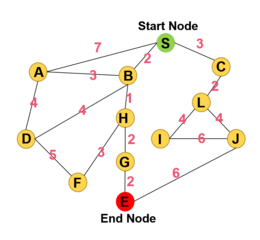

In [ ]:
g = Graph()
g.add_edge('s', 'a', 7)  
g.add_edge('s', 'b', 2)
g.add_edge('s', 'c', 3)
g.add_edge('a', 'b', 3)
g.add_edge('a', 'd', 4)
g.add_edge('b', 'd', 4)
g.add_edge('b', 'h', 1)
g.add_edge('c', 'l', 2)
g.add_edge('d', 'f', 5)
g.add_edge('f', 'h', 3)  
g.add_edge('h', 'g', 2)
g.add_edge('g', 'e', 2)
g.add_edge('l', 'i', 4)
g.add_edge('l', 'j', 4)
g.add_edge('i', 'j', 6)
g.add_edge('j', 'e', 6)
print(g)

# def dijkstra(aGraph, start, target)
dijkstra(g, g.get_Node('s'), g.get_Node('e')) 

target = g.get_Node('e')
path = [target.id] #E.id
shortest(target, path)
print ('The shortest path : %s' %(path[::-1]))

Graph data:( Node:s ,Node:a, Dist:  7)( Node:s ,Node:b, Dist:  2)( Node:s ,Node:c, Dist:  3)( Node:a ,Node:s, Dist:  7)( Node:a ,Node:b, Dist:  3)( Node:a ,Node:d, Dist:  4)( Node:b ,Node:s, Dist:  2)( Node:b ,Node:a, Dist:  3)( Node:b ,Node:d, Dist:  4)( Node:b ,Node:h, Dist:  1)( Node:c ,Node:s, Dist:  3)( Node:c ,Node:l, Dist:  2)( Node:d ,Node:a, Dist:  4)( Node:d ,Node:b, Dist:  4)( Node:d ,Node:f, Dist:  5)( Node:h ,Node:b, Dist:  1)( Node:h ,Node:f, Dist:  3)( Node:h ,Node:g, Dist:  2)( Node:l ,Node:c, Dist:  2)( Node:l ,Node:i, Dist:  4)( Node:l ,Node:j, Dist:  4)( Node:f ,Node:d, Dist:  5)( Node:f ,Node:h, Dist:  3)( Node:g ,Node:h, Dist:  2)( Node:g ,Node:e, Dist:  2)( Node:e ,Node:g, Dist:  2)( Node:e ,Node:j, Dist:  6)( Node:i ,Node:l, Dist:  4)( Node:i ,Node:j, Dist:  6)( Node:j ,Node:l, Dist:  4)( Node:j ,Node:i, Dist:  6)( Node:j ,Node:e, Dist:  6)
Dijkstra's shortest path
[(0, node: s neighbor: ), (9223372036854775807, node: a neighbor: ), (9223372036854775807, node: b 

## Q2a. Please add a new text cell and write the pseudo code for A Star algorithm.



Pseudo code for A* algorithm
- separate nodes between visited and unvisited (create `unvisited_queue`; create `visited` bool in Node class, which is initialized to False)
- define the heuristic estimates of each Node
- define the `total_distance` of a Node as the tentative distance + the heuristic estimate
- start Node has a distance of 0
- all other Nodes have initial distance of inf
- all Nodes are unvisited, inside the `unvisited_queue`
- start with starting Node as `current`
- for all of `current`'s neighbors that are unvisited, calculate their tentative distance (tentative distance = previous covered distance + current distance) and total distance (total distance = heuristic estimate + tentative distance)
- if the calculated total distance is less than the neighbor Node's total_distance, then update the neighbor Node's total_distance as the total distance
- move the `current` Node out of the `unvisited_queue` and set `visited` bool to True
- continue until the target node is visited OR the smallest tentative distance in the `unvisited_queue` is infinity

## Q2b. Please complete the A_star function (A star algorithm) below:
### Note: You can make changes to the Node class or Graph Class if needed

In [ ]:
def A_Star(aGraph, start, target):
    print ('''A Star shortest path''')
    # Set the distance for the start Node to zero 
    start.set_distance(0)

    # Put tuple pair into the priority queue
    # Change to v.total_dist
    # so that the min heap pops the Node with the smallest total_dist
    unvisited_queue = [(v.total_dist,v) for v in aGraph]
    # [(inf,a),(inf,b),(inf,c),(inf,d),(inf,e),(inf,f),....]
    
    print(unvisited_queue)
    heapq.heapify(unvisited_queue) # Transform list x into a heap (min heap)
    print("Priority Queue (Distance, Node, Neighbors): \n................\n",
          unvisited_queue)

    # This is for the BONUS: changing the conditions for the while loop
    while ((not target.visited) or unvisited_queue[0][0] == sys.maxsize):
    # while len(unvisited_queue):
        # Pops a Node with the smallest distance 
        unvisited = heapq.heappop(unvisited_queue)
        current = unvisited[1] # accessing Node data
        current.set_visited() # set visit flag to True
        
        
        
        
        
        
        
        # Search the neighbors of current Node and update path:
        for next in current.neighbor:
            # if visited, skip
            if next.visited:
                continue
            new_dist = current.distance + current.get_weight(next)
            total_dist = new_dist + next.estimate
            

            ''' 1. Complete This Part '''
            if total_dist < next.total_dist:
                next.set_distance(new_dist)
                next.set_total_distance(total_dist)
                next.set_previous(current)
                print ('updated node dist: current = %s next = %s new_dist = %s' \
                        %(current.id, next.id, next.distance))
            else:
                print ('not updated : current = %s next = %s new_dist = %s' \
                        %(current.id, next.id, next.distance))

        # Rebuild heap
        # 1. Pop every item, clear the heap
        while len(unvisited_queue):
            heapq.heappop(unvisited_queue)
      
        # 2. Put all node not visited into the priority queue (e.g. delete current)

        ''' 2. Complete This Part '''
        unvisited_queue = [(v.total_dist,v)\
                           for v in aGraph if v.visited == False]

        heapq.heapify(unvisited_queue)
        print("Priority Queue (Distance, Node, Neighbors): \n................\n",
              unvisited_queue)

def shortest(v, path):
    ''' make shortest path from v.previous'''
    if v.previous:
        path.append(v.previous.id)
        shortest(v.previous, path)
    return

## Q2c. Please test your A_star function and the dijkstra algorithm using the graph below.
### Note: You need to print your path finding process similar to the Dijkstra above.
### Note: Red number indicates the distance from node to node, Black number associated with nodes indiactes their estimated remaining distance to the end node
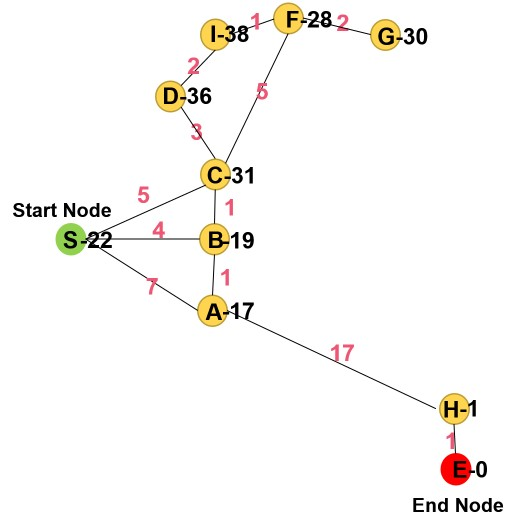


In [ ]:
g = Graph()
g.add_edge('s', 'a', 7)  
g.add_edge('s', 'b', 4)
g.add_edge('s', 'c', 5)
g.add_edge('a', 'b', 1)
g.add_edge('b', 'c', 1)
g.add_edge('c', 'd', 3)
g.add_edge('c', 'f', 5)
g.add_edge('d', 'i', 2)
g.add_edge('i', 'f', 1)
g.add_edge('f', 'g', 2)
g.add_edge('a', 'h', 17)
g.add_edge('h', 'e', 0)
print(g)

# Please note I did not use dist_remain
g.add_estimate('s',22)
g.add_estimate('a',17)
g.add_estimate('b',19)
g.add_estimate('c', 31)
g.add_estimate('d', 36)
g.add_estimate('e',0)
g.add_estimate('f',28)
g.add_estimate('g',30)
g.add_estimate('h',1)
g.add_estimate('i',38)

A_Star(g, g.get_Node('s'), g.get_Node('e'))

target = g.get_Node('e')
path = [target.id]
shortest(target, path)
print ('The shortest path : %s' %(path[::-1]))


Graph data:( Node:s ,Node:a, Dist:  7)( Node:s ,Node:b, Dist:  4)( Node:s ,Node:c, Dist:  5)( Node:a ,Node:s, Dist:  7)( Node:a ,Node:b, Dist:  1)( Node:a ,Node:h, Dist: 17)( Node:b ,Node:s, Dist:  4)( Node:b ,Node:a, Dist:  1)( Node:b ,Node:c, Dist:  1)( Node:c ,Node:s, Dist:  5)( Node:c ,Node:b, Dist:  1)( Node:c ,Node:d, Dist:  3)( Node:c ,Node:f, Dist:  5)( Node:d ,Node:c, Dist:  3)( Node:d ,Node:i, Dist:  2)( Node:f ,Node:c, Dist:  5)( Node:f ,Node:i, Dist:  1)( Node:f ,Node:g, Dist:  2)( Node:i ,Node:d, Dist:  2)( Node:i ,Node:f, Dist:  1)( Node:g ,Node:f, Dist:  2)( Node:h ,Node:a, Dist: 17)( Node:h ,Node:e, Dist:  0)( Node:e ,Node:h, Dist:  0)
A Star shortest path
[(9223372036854775807, node: s neighbor: ), (9223372036854775807, node: a neighbor: ), (9223372036854775807, node: b neighbor: ), (9223372036854775807, node: c neighbor: ), (9223372036854775807, node: d neighbor: ), (9223372036854775807, node: f neighbor: ), (9223372036854775807, node: i neighbor: ), (9223372036854775

## Q2d.Please add a new text cell to describe the differences of the two algorithms and explain the reason behind it.

Dijkstra is a blind search algorithm that does not take into consideration the location of the end target; in constrast, A* includes a heuristic estimate to the end target.

Dijkstra performs poorly in some cases, for example Q2, where the minimum distance leads the algorithm further from E. The heuristic estimate adds additional weighting to each Node. 

Thus, the A* method has additional parameters, such as `total_distance`. The total distance of each Node is defined as the heuristic estimate and the tentative distance. The algorithm now uses  the `total_distance` to determine the path by selecting the node with the smallest `total_distane`

Both algorithms use `unvisited = heapq.heappop(unvisited_queue)`; however, Dijkstra defines the heap with the tentative distance and pops the Node with the smallest tentative distance. A* defines the heap with the total distance and pops the node with the smallest total distnce

## Q2e. What is the time complexity of the Dijkstra and A Star algorithms you realized above?

Time complexity of Dijkstra: O(n^2)

Time complexity of A*: O(n^2)

---

Both algorithms use a while loop that loops over the values in `unvisited_queue`. We can assume a worse case scenario where it is needed to loop over every Node. (Linear)

Inside the while loop (Linear), the algorithms pop the current Node (constant) as the Node with the smallest distance (tentative or total, depending on the algorithm)... then the algorithm uses a for loop (linear) to iterate over the current Node's neighbors.

While the examples have Nodes with few neighbors, in general, we can assume a worst-case scenario where a Node is a neighbor to every other Node.

Lastly, in the while loop, we call heapify, which is also linear (O(n))

In this case, the algorithms have O(n^2) time complexity due to the nested for loop inside of the while loop.

Both algorithms use this format; therefore, both have the same complexity of O(n^2)